In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Curating expression datasets for studies/GEO files

study_1 = pd.read_excel("path to file with gene expression from GEO or study")
study_1 = study_1[study_1["pvalue"] <0.05]
study_1 = study_1.dropna()

study_1 = study_1[['Gene.symbol','adj.P.Val', 'logFC']]
study_1 = study_1.rename(columns={"Gene.symbol":"Gene Name", "adj.P.Val":"pvalue", "logFC":"logchange"})

listofstudygenes = study_1["Gene Name"].to_list()
new_genes = []

for i in listofstudygenes:
    x = i.split("/")[0]
    new_genes.append(x)

study_1["Gene Name"] = new_genes
study_1 = study_1.groupby('Gene Name').median().reset_index()


# Curating expression datasets for drugs

p450 = pd.read_csv("path to p450 file")
p450 = p450[p450["padj"] <0.05]

p900 = pd.read_csv("path to p900 file")
p900 = p900[p900["padj"] <0.05]

sf6222 = pd.read_csv("path to sf6222 file")
sf6222 = sf6222[sf6222["padj"] <0.05]
sf6222 = sf6222[["log2FoldChange","padj","Gene.name"]]

sf7009 = pd.read_csv("path to sf7009 file")
sf7009 = sf7009[sf7009["padj"] <0.05]
sf7009 = sf7009[["log2FoldChange","padj","Gene.name"]]

sf7044 = pd.read_csv("path to sf7044 file")
sf7044 = sf7044[sf7044["padj"] <0.05]
sf7044 = sf7044[["log2FoldChange","padj","Gene.name"]]

um101 = pd.read_csv("path to um101 file")
um101 = um101[um101["padj"] <0.05]
um101 = um101[["log2FoldChange","padj","Gene.name"]]

tnf = pd.read_csv("path to tnf file")
tnf = tnf[tnf["padj"] <0.05]
tnf = tnf[["log2FoldChange","padj","Gene.name"]]

sf3030 = pd.read_csv("path to sf3030 file")
sf3030 = sf3030[sf3030["padj"] <0.05]
sf3030 = sf3030[["log2FoldChange","padj","Gene.name"]]

pdgf = pd.read_csv("path to PDGF file")
pdgf = pdgf[pdgf["padj"] <0.05]

bvd = pd.read_csv("path to BVD file")
bvd = bvd[bvd["padj"] <0.05]

p450_median = p450.groupby('Gene.name').median().reset_index()
p900_median = p900.groupby('Gene.name').median().reset_index()
sf7009_median = sf7009.groupby('Gene.name').median().reset_index()
sf7044_median = sf7044.groupby('Gene.name').median().reset_index()
sf6222_median = sf6222.groupby('Gene.name').median().reset_index()
sf3030_median = sf3030.groupby('Gene.name').median().reset_index()
tnf_median = tnf.groupby('Gene.name').median().reset_index()
um101_median = um101.groupby('Gene.name').median().reset_index()
pdgf_median = pdgf.groupby('Gene.name').median().reset_index()
bvd_median = bvd.groupby('Gene.name').median().reset_index()

merged_table = pd.merge(p450_median, p900_median, on="Gene.name", how="inner")
p450_900_450 = merged_table[['Gene.name', 'padj_x', "log2FoldChange_x"]]
p450_900_900 = merged_table[['Gene.name', 'padj_y', "log2FoldChange_y"]]

merged_table['log2FoldChange'] = (merged_table['log2FoldChange_x'] + merged_table['log2FoldChange_y']) / 2
average_450_900 = merged_table[['Gene.name','log2FoldChange']]

placebo = pd.read_csv("path to placebo file")
placebo = placebo.rename(columns={"p-value":"padj", "protein":"Gene.name"})
placebo = placebo[placebo["padj"] <0.05]
placebo = placebo.groupby('Gene.name').median().reset_index()

placebo_inflammation = pd.read_csv("/Users/rishabhgoel/Desktop/GEn1E Strategy/Drug Data/Placebo_inflammation.csv")
placebo_inflammation = placebo_inflammation.rename(columns={"p-value":"padj", "protein":"Gene.name"})
placebo_inflammation = placebo_inflammation[placebo_inflammation["padj"] <0.05]
placebo_inflammation = placebo_inflammation.groupby('Gene.name').median().reset_index()


#  Option to keep only significant genes with a log fold change threshold

# study_1 = study_1[(study_1["logchange"]>1) | (study_1["logchange"]<(-1))]



# Naming final instance of curated GEO dataset

corr_check = study_1

/var/folders/cd/1pn_n69n5vzf7yz6_fmnrkjr0000gp/T/ipykernel_89168/3738193197.py:79: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  placebo = placebo.groupby('Gene.name').median().reset_index()
/var/folders/cd/1pn_n69n5vzf7yz6_fmnrkjr0000gp/T/ipykernel_89168/3738193197.py:87: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  abmrA = abmrA.groupby('Gene Name').median().reset_index()


In [ ]:
# Merging all drug datasets with expression dataset

average_merge_450_900 = corr_check.merge(average_450_900, how='inner', on=None, left_on=symbol_col, right_on="Gene.name", left_index=False, right_index=False)
merge_450 = corr_check.merge(p450_median, how='inner', on=None, left_on=symbol_col, right_on="Gene.name", left_index=False, right_index=False)
merge_900 = corr_check.merge(p900_median, how='inner', on=None, left_on=symbol_col, right_on="Gene.name", left_index=False, right_index=False)
merge_sf7044 = corr_check.merge(sf7044_median, how='inner', on=None, left_on=symbol_col, right_on="Gene.name", left_index=False, right_index=False)
merge_sf6222 = corr_check.merge(sf6222_median, how='inner', on=None, left_on=symbol_col, right_on="Gene.name", left_index=False, right_index=False)
merge_sf7009 = corr_check.merge(sf7009_median, how='inner', on=None, left_on=symbol_col, right_on="Gene.name", left_index=False, right_index=False)
merge_um101 = corr_check.merge(um101_median, how='inner', on=None, left_on=symbol_col, right_on="Gene.name", left_index=False, right_index=False)
merge_sf3030 = corr_check.merge(sf3030_median, how='inner', on=None, left_on=symbol_col, right_on="Gene.name", left_index=False, right_index=False)
merge_pdgf = corr_check.merge(pdgf_median, how='inner', on=None, left_on=symbol_col, right_on="Gene.name", left_index=False, right_index=False)
merge_bvd = corr_check.merge(bvd_median, how='inner', on=None, left_on=symbol_col, right_on="Gene.name", left_index=False, right_index=False)
merge_tnf = corr_check.merge(tnf_median, how='inner', on=None, left_on=symbol_col, right_on="Gene.name", left_index=False, right_index=False)

In [ ]:
 def create_table(disease_column, corr_check, symbol_col):

    p450 = pd.read_csv("path to p450 file")
    p450 = p450[p450["padj"] <0.05]

    p900 = pd.read_csv("path to p900 file")
    p900 = p900[p900["padj"] <0.05]

    sf6222 = pd.read_csv("path to sf6222 file")
    sf6222 = sf6222[sf6222["padj"] <0.05]
    sf6222 = sf6222[["log2FoldChange","padj","Gene.name"]]

    sf7009 = pd.read_csv("path to sf7009 file")
    sf7009 = sf7009[sf7009["padj"] <0.05]
    sf7009 = sf7009[["log2FoldChange","padj","Gene.name"]]

    sf7044 = pd.read_csv("path to sf7044 file")
    sf7044 = sf7044[sf7044["padj"] <0.05]
    sf7044 = sf7044[["log2FoldChange","padj","Gene.name"]]

    um101 = pd.read_csv("path to um101 file")
    um101 = um101[um101["padj"] <0.05]
    um101 = um101[["log2FoldChange","padj","Gene.name"]]

    tnf = pd.read_csv("path to tnf file")
    tnf = tnf[tnf["padj"] <0.05]
    tnf = tnf[["log2FoldChange","padj","Gene.name"]]

    sf3030 = pd.read_csv("path to sf3030 file")
    sf3030 = sf3030[sf3030["padj"] <0.05]
    sf3030 = sf3030[["log2FoldChange","padj","Gene.name"]]

    pdgf = pd.read_csv("path to PDGF file")
    pdgf = pdgf[pdgf["padj"] <0.05]

    bvd = pd.read_csv("path to BVD file")
    bvd = bvd[bvd["padj"] <0.05]

    p450_median = p450.groupby('Gene.name').median().reset_index()
    p900_median = p900.groupby('Gene.name').median().reset_index()
    sf7009_median = sf7009.groupby('Gene.name').median().reset_index()
    sf7044_median = sf7044.groupby('Gene.name').median().reset_index()
    sf6222_median = sf6222.groupby('Gene.name').median().reset_index()
    sf3030_median = sf3030.groupby('Gene.name').median().reset_index()
    tnf_median = tnf.groupby('Gene.name').median().reset_index()
    um101_median = um101.groupby('Gene.name').median().reset_index()
    pdgf_median = pdgf.groupby('Gene.name').median().reset_index()
    bvd_median = bvd.groupby('Gene.name').median().reset_index()

    merged_table = pd.merge(p450_median, p900_median, on="Gene.name", how="inner")
    p450_900_450 = merged_table[['Gene.name', 'padj_x', "log2FoldChange_x"]]
    p450_900_900 = merged_table[['Gene.name', 'padj_y', "log2FoldChange_y"]]

    merged_table['log2FoldChange'] = (merged_table['log2FoldChange_x'] + merged_table['log2FoldChange_y']) / 2
    average_450_900 = merged_table[['Gene.name','log2FoldChange']]

    average_merge_450_900 = corr_check.merge(average_450_900, how='inner', on=None, left_on=symbol_col, right_on="Gene.name", left_index=False, right_index=False)
    merge_450 = corr_check.merge(p450_median, how='inner', on=None, left_on=symbol_col, right_on="Gene.name", left_index=False, right_index=False)
    merge_900 = corr_check.merge(p900_median, how='inner', on=None, left_on=symbol_col, right_on="Gene.name", left_index=False, right_index=False)
    merge_sf7044 = corr_check.merge(sf7044_median, how='inner', on=None, left_on=symbol_col, right_on="Gene.name", left_index=False, right_index=False)
    merge_sf6222 = corr_check.merge(sf6222_median, how='inner', on=None, left_on=symbol_col, right_on="Gene.name", left_index=False, right_index=False)
    merge_sf7009 = corr_check.merge(sf7009_median, how='inner', on=None, left_on=symbol_col, right_on="Gene.name", left_index=False, right_index=False)
    merge_um101 = corr_check.merge(um101_median, how='inner', on=None, left_on=symbol_col, right_on="Gene.name", left_index=False, right_index=False)
    merge_sf3030 = corr_check.merge(sf3030_median, how='inner', on=None, left_on=symbol_col, right_on="Gene.name", left_index=False, right_index=False)
    merge_pdgf = corr_check.merge(pdgf_median, how='inner', on=None, left_on=symbol_col, right_on="Gene.name", left_index=False, right_index=False)
    merge_bvd = corr_check.merge(bvd_median, how='inner', on=None, left_on=symbol_col, right_on="Gene.name", left_index=False, right_index=False)
    merge_tnf = corr_check.merge(tnf_median, how='inner', on=None, left_on=symbol_col, right_on="Gene.name", left_index=False, right_index=False)

    print(merge_450)


    log_fold_drug = "log2FoldChange"

    try:
        average_p900_p450_corr, _ = pearsonr(average_merge_450_900[disease_column], average_merge_450_900[log_fold_drug])
    except:
        average_p900_p450_corr = "NA"

    try:
        p450_corr, _ = pearsonr(merge_450[disease_column], merge_450[log_fold_drug])
    except:
        p450_corr = "NA"

    try:
        p900_corr, _ = pearsonr(merge_900[disease_column], merge_900[log_fold_drug])
    except:
        p900_corr = "NA"

    try:
        sf7044_corr, _ = pearsonr(merge_sf7044[disease_column], merge_sf7044[log_fold_drug])
    except:
        sf7044_corr = "NA"

    try:
        sf7009_corr, _ = pearsonr(merge_sf7009[disease_column], merge_sf7009[log_fold_drug])
    except:
        sf7009_corr = "NA"

    try:
        sf6222_corr, _ = pearsonr(merge_sf6222[disease_column], merge_sf6222[log_fold_drug])
    except:
        sf6222_corr = "NA"

    try:
        um101_corr, _ = pearsonr(merge_um101[disease_column], merge_um101[log_fold_drug])
    except:
        um101_corr = "NA"

    try:
        tnf_corr, _ = pearsonr(merge_tnf[disease_column], merge_tnf[log_fold_drug])
    except:
        tnf_corr = "NA"

    try:
        sf3030_corr, _ = pearsonr(merge_sf3030[disease_column], merge_sf3030[log_fold_drug])
    except:
        sf3030_corr = "NA"

    try:
        pdgf_corr, _ = pearsonr(merge_pdgf[disease_column], merge_pdgf[log_fold_drug])
    except:
        pdgf_corr = "NA"

    try:
        bvd_corr, _ = pearsonr(merge_bvd[disease_column], merge_bvd[log_fold_drug])
    except:
        bvd_corr = "NA"

    dict_of_correlations = {'Compound Dataset': ["GEn-1124 Proteomics 450mg BID", "GEn-1124 Proteomics 900mg BID",
                                                "GEn-1124 Proteomics Average",
                                               "GEn-1124 RNA-Seq",
                                                 "TNF RNA-Seq",
                                               "GEn-3030 Proteomics",
                                               "PDGF Proteomics",
                                               "BVD Proteomics"],
                            'Total Compound Dataset Genes': [len(p450_median), len(p900_median),
                            len(average_450_900), len(sf7044_median), len(tnf_median), len(sf3030_median), len(pdgf_median),len(bvd_median)
                            ],
                            'Overlapping Genes (Compound and Disease)': [len(merge_450), len(merge_900),
                            len(average_merge_450_900), len(merge_sf7044), len(merge_tnf), len(merge_sf3030), len(merge_pdgf),len(merge_bvd)
                            ],
                            'Correlation with Disease': [p450_corr, p900_corr, average_p900_p450_corr, sf7044_corr,
                                                         tnf_corr, sf3030_corr, pdgf_corr, bvd_corr
                                                         ]}


    correlation_table = pd.DataFrame.from_dict(dict_of_correlations)

    return correlation_table



def get_correlation_table(file):

    symbol_col = "Gene Name"

    log_col = 'logchange'
    pval_col = 'pvalue'

    corr_check = corr_check[corr_check[pval_col] <= 0.05]

    corr_check = corr_check[((corr_check[log_col] <= -1) | (corr_check[log_col] >= 1))]

    for i in corr_check.columns:
        if i == symbol_col:
            continue
        else:
            corr_check[i] = pd.to_numeric(corr_check[i], errors='coerce')

    corr_check = corr_check.groupby(symbol_col).median().reset_index()

    correlation_table = create_table(log_col, corr_check, symbol_col)
    correlation_table

    return correlation_table


correlation_table = get_correlation_table(file_stream)

print(correlation_table)

/var/folders/cd/1pn_n69n5vzf7yz6_fmnrkjr0000gp/T/ipykernel_2798/2284541881.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_table.rename(columns={"logchange": 'ABMR_Log_Change', 'log2FoldChange': 'GEn1E-1124'}, inplace=True)


Expression Pattern  Kidney ABMR  GEn-1124 (RNA-Seq)
Gene Name                                          
ACKR1                  1.225526           -0.425452
ANKRD1                 1.840000            0.749113
APOBEC3G               1.020000           -1.213847
CD37                   1.355402           -1.544997
CD38                   1.316969           -0.478977
CDH13                  1.056587            0.204116
CORO1A                 1.364365           -0.686100
CXCL10                 2.055996           -4.500982
CXCL11                 2.269632           -2.565628
GBP4                   1.273582           -2.734770
GMFG                   1.033867            0.190516
HCLS1                  1.006909           -0.424801
IL7R                   1.256826           -0.390483
IRF1                   1.013959            0.707819
ITGA4                  1.309910            0.253935
KLHL6                  1.022730            1.437805
PDCD1LG2               1.015541           -0.145404
SERPINB9    

/var/folders/cd/1pn_n69n5vzf7yz6_fmnrkjr0000gp/T/ipykernel_2798/2284541881.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disease_columns["Expression Pattern"] = "Kidney ABMR"
/var/folders/cd/1pn_n69n5vzf7yz6_fmnrkjr0000gp/T/ipykernel_2798/2284541881.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drug_columns["Expression Pattern"] = name_of_drug


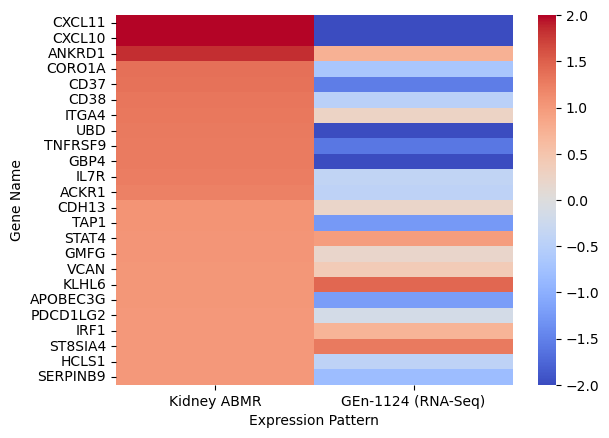

In [184]:
def makeheatmap(table, drug_column, name_of_drug, top_number=None):
    
    table['mixlog'] = table['logchange'] + table[drug_column]
    table = table.sort_values("logchange", ascending=False)
    
#     Option to only keep the top 24 genes (top 12 upregulated and top 12 downregulated)

#     table_head = table.head(12) 
#     table_tail = table.tail(12) 
#     table = pd.concat([table_head, table_tail])
    
    new_table = table[["Gene Name", "logchange", "log2FoldChange"]]
    new_table.rename(columns={"logchange": 'Disease_Log_Change', 'log2FoldChange': name_of_drug}, inplace=True)
    
    new_table.to_excel('path to create the raw file with the heatmap data for the compound', index=False)
    
    if top_number:
        table = table.sample(top_number, random_state=42)       
    disease_columns = table[["Gene Name", "logchange"]]
    disease_columns["Expression Pattern"] = "Disease Name"

    drug_columns = table[["Gene Name", drug_column]]
    drug_columns["Expression Pattern"] = name_of_drug
    drug_columns = drug_columns.rename(columns={drug_column:"logchange"})
    drugname = name_of_drug

    final_heatmap = pd.concat([disease_columns, drug_columns])    
    
    final_heatmap = final_heatmap.pivot("Gene Name", "Expression Pattern","logchange")
    column_order = ['Disease Name', "GEn-1124 (RNA-Seq)"]
    final_heatmap = final_heatmap.reindex(column_order, axis=1) 
    final_heatmap = final_heatmap.sort_values('Disease Name', ascending=False)

    print(final_heatmap)

    sns.heatmap(final_heatmap , cmap="coolwarm", vmin=-2, vmax=+2)

    
# This function can be run on all drugs. Examples are below. Uncomment to use

# average_p900_p450_heatmap = makeheatmap(average_merge_450_900, 'average', "P_450_900_average")
# p900_p450_p450_heatmap = makeheatmap(merge_450_900_450, 'log2FoldChange_x', "P_450_900_450")
# p900_p450_p900_heatmap = makeheatmap(merge_450_900_900, 'log2FoldChange_y', "P_450_900_900")
# p450_heatmap = makeheatmap(merge_450, 'log2FoldChange', "P450")
# p900_heatmap = makeheatmap(merge_900, 'log2FoldChange', "P900")
# sf7044_heatmap = makeheatmap(merge_sf7044, 'log2FoldChange', "GEn-1124 (RNA-Seq)")
# sf7009_heatmap = makeheatmap(merge_sf7009, 'log2FoldChange', "SF7009")
# sf6222_heatmap = makeheatmap(merge_sf6222, 'log2FoldChange', "SF6222")
# um101_heatmap = makeheatmap(merge_um101, 'log2FoldChange', "UM101")